<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-и-выбор-оптимальной-модели-без-балансирования-классов" data-toc-modified-id="Подготовка-и-выбор-оптимальной-модели-без-балансирования-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка и выбор оптимальной модели без балансирования классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Учет-взвешивания-классов" data-toc-modified-id="Учет-взвешивания-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Учет взвешивания классов</a></span></li><li><span><a href="#Up-sampling-класса" data-toc-modified-id="Up-sampling-класса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Up-sampling класса</a></span></li><li><span><a href="#Down-sampling-класса" data-toc-modified-id="Down-sampling-класса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Down-sampling класса</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестированиие-оптимальной-модели" data-toc-modified-id="Тестированиие-оптимальной-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестированиие оптимальной модели</a></span></li><li><span><a href="#Исследование-метрики-AUC-ROC" data-toc-modified-id="Исследование-метрики-AUC-ROC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование метрики AUC-ROC</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Описание параметров:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import re
#import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Вывод:** Данные содержат как цифровые значения разного масштаба, так и категориальные переменные. Необходимо провести подготовку данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Приведем имена стольбцов к стандартному виду: уберем заглавные буквы, вставим символ подчеркивания, 
# приведем к нижнему регистру

new_col_name = []
for col_name in data.columns:
    new_col_name.append('_'.join(re.findall('[A-Z][^A-Z]*', col_name)))

data.columns=new_col_name
data.columns=data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим пропущенные значения, так как срок сотрудничества может влиять на вероятность 
отказа от услуг банка, при этом заменить пропуски, каким-либо корректным значением, не возможно.  

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


**Выборка данных для модели из общего датафрэйма**

In [8]:
target = data['exited']
data = data.drop(['exited','row_number', 'customer_id', 'surname'], axis=1)

In [9]:
data.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10


**Кодирование категориальных переменных**

In [10]:
encoder = OrdinalEncoder()
data_dummies = pd.DataFrame(encoder.fit_transform(data), columns=data.columns) 

In [11]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,1,0


**Масштабирование числовых переменных**

In [12]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# < напишите код здесь >
scaler = StandardScaler()
scaler.fit(data_dummies[numeric])
data_dummies[numeric] = scaler.transform(data_dummies[numeric])

Переименуем набор параметров 

In [13]:
features = data_dummies

**Разделение выборки на обучающую валидационную и тестовую. Используем пропорцию 60:20:20** 

In [14]:
features_test_train, features_valid, target_test_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

Выделим тестовую выборку:

In [15]:
features_train, features_test, target_train, target_test = train_test_split(
    features_test_train, target_test_train, test_size=0.25, random_state=12345)

Проверим размер выборок

In [16]:
features_train.shape

(5454, 13)

In [17]:
features_valid.shape

(1819, 13)

In [18]:
features_test.shape

(1818, 13)

**Вывод:** Данные подготовлены, проведено масштабирование, кодирование категориальных переменных, выделен целевой параметр. Выборка разбита на части в пропорции 60:20:20

## Исследование задачи

**Проверим сбалансированность класса ответов**

0    0.796062
1    0.203938
Name: exited, dtype: float64


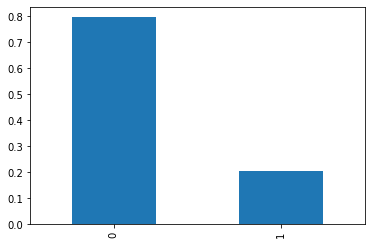

In [19]:
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

**Вывод:** Класс ответов не сбалансирован соотношение позитивных и негативных значений отличается от пропорции 50:50

### Подготовка и выбор оптимальной модели без балансирования классов ###


**Модель логистической регрессии**

In [20]:
model_log_reg = None
accuracy = 0

model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log_reg.fit(features_train, target_train)
predicted_valid = model_log_reg.predict(features_valid)

accuracy = accuracy_score(target_valid, predicted_valid)
print('Точность модели:', accuracy)
print('F1-мера:', f1_score(target_valid, predicted_valid))


Точность модели: 0.8185816382627817
F1-мера: 0.32653061224489793


In [21]:
probabilities_valid = model_log_reg.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('Критерий AUC_ROC:', auc_roc)

Критерий AUC_ROC: 0.772456306733505


**Модель решающего дерева**

In [22]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) # получите предсказания модели


accuracy = accuracy_score(target_valid, predicted_valid)
print('Точность модели:', accuracy)
print('F1-мера:', f1_score(target_valid, predicted_valid))

Точность модели: 0.782847718526663
F1-мера: 0.4754316069057104


**Модель случайный лес**

In [23]:
%%time
best_model_forest = None
best_f1 = 0
best_est = 0
best_depth = 0

for est in range(10, 61, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
    
        if result > best_f1:
            best_model_forest = model 
            best_f1 = result
            best_est = est
            best_depth = depth

print("Наилучший F1-критерий модели случайный лес на валидационной выборке:", best_f1)
print("Наибольшая точность при количестве деревьев:", best_est, "Глубине дерева:", best_depth)
print()

Наилучший F1-критерий модели случайный лес на валидационной выборке: 0.563922942206655
Наибольшая точность при количестве деревьев: 40 Глубине дерева: 12

CPU times: user 14.5 s, sys: 83.7 ms, total: 14.6 s
Wall time: 14.6 s


In [24]:
probabilities_valid = best_model_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('Критерий AUC_ROC:', auc_roc)

Критерий AUC_ROC: 0.8325430158515107


**Вывод:** Проведено обучение трех моделей классификации:  
 * Логистическая регрессия
 * Решающее дерево
 * Случайный лес

Параметры наилучшей модели без учета дисбаланса классов. 
* Тип: Случайный лес
* Глубина дерева: 12
* Количество деревьев: 40
* F1-критерий: 0.563



## Борьба с дисбалансом

### Учет взвешивания классов

Общее допущение: Поскольку класс ответов не сбалансирован, то при обучении моделей укажем параметр class_weight='balanced'.

In [25]:
%%time
best_model_forest = None
best_f1 = 0
best_est = 0
best_depth = 0

for est in range(10, 61, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
    
        if result > best_f1:
            best_model_forest = model 
            best_f1 = result
            best_est = est
            best_depth = depth

print("Наилучший F1-критерий модели случайный лес на валидационной выборке:", best_f1)
print("Наибольшая точность при количестве деревьев:", best_est, "Глубине дерева:", best_depth)

probabilities_valid = best_model_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('Критерий AUC_ROC:', auc_roc)
print()

Наилучший F1-критерий модели случайный лес на валидационной выборке: 0.6163069544364508
Наибольшая точность при количестве деревьев: 60 Глубине дерева: 7
Критерий AUC_ROC: 0.8497550015806349

CPU times: user 13.9 s, sys: 40.1 ms, total: 13.9 s
Wall time: 14 s


**Вывод:** Параметры наилучшей модели c учетом взвешивания классов. 
* Тип: Случайный лес
* Глубина дерева: 7
* Количество деревьев: 60
* F1-критерий: 0.616


### Up-sampling класса

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print(target_upsampled.value_counts(normalize=True))

F1: 0.5839017735334243
1    0.508001
0    0.491999
Name: exited, dtype: float64


### Down-sampling класса

In [27]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)



model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=12)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

best_f1 = f1_score(target_valid, predicted_valid)
print("Наилучший F1-критерий модели случайный лес на валидационной выборке:", best_f1)
print(target_downsampled.value_counts(normalize=True))

Наилучший F1-критерий модели случайный лес на валидационной выборке: 0.5693430656934306
1    0.507944
0    0.492056
Name: exited, dtype: float64


## Тестирование модели

### Тестированиие оптимальной модели

In [28]:
predicted_valid = best_model_forest.predict(features_test)

best_f1 = f1_score(target_test, predicted_valid)
print("Наилучший F1-критерий модели Случайный лес на валидационной выборке:", best_f1)

Наилучший F1-критерий модели Случайный лес на валидационной выборке: 0.5919610231425091


### Исследование метрики AUC-ROC

In [29]:
probabilities_valid = best_model_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print(auc_roc)

0.8497550015806349


**Вывод:** Для самой худшей модели - модели "Логистической регресии" без балансирования классов показатель auc_roc составил 0,7724, для самой лучшей модели "Случайный лес" показатель auc_roc составил 0,8497

**Вывод:** 

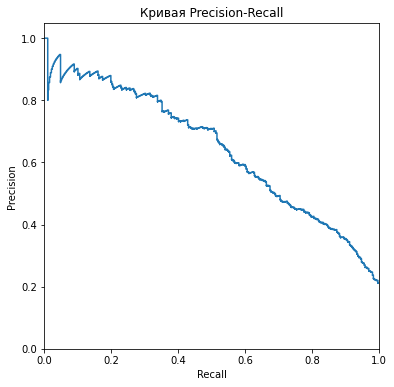

In [30]:

precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one_valid)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

## Выводы ##

1. Исходная выборка состоит из 10000 записей. После очистки от пропущенных значений в выборке осталось 9091 
2. В выборке были как категориальные переменные так и числовые переменные в разном масштабе. 
3. Проведено кодирование категориальных переменных, масштабирование числовых переменных. Приведение названия столбцов к стандартному виду.
4. Выборка была разбита в соотношении обучающая:валидационная:тестовая как 60:20:20
5. В рамках задачи классификации рассмотрены модели:
- Логистической регрессии.
- Дерево решений;
- Случайный лес.
6. Наилучший результат на валидационной выборке показала модель: "Случайный лес" F1-критерий - 0,563 
   при количестве деревьев = 40 и глубине дерева 12.
7. F1-критерий для остальных моделей:
- Логиcтическая регрессия -0,326
- Дерево решений - 0,475
8. В классе ответов есть перекос негативные:позитивные = 80:20 
9. Выполнена корректировка дисбаланса классов. Для этого использованы методы:
 - Взвешивание классов через параметр class_weight='balanced' при обучении моделей
 - Up-sampling
 - Down-sampling

10. На валидационной выборке наилучшие значения были получены при взвешивании классов, F1=0,616. 
 - для метода Up-sampling F1= 0,583
 - для метода Down-sampling F1=0,569
 
11. На тестовой выборке для модели "Случайный лес" с учетом взвешивания классов получено значение F1=0,5919 что является достаточным уровнем по условиям задачи. При этом AUC-ROC = 0,8497.  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*